# Métodos III

### *J.A. Hernando, Particle Physics Department, USC, 2018*

## Appendix- Panda and Matplotlib

In [1]:
import time
print(' Last revision {}'.format(time.asctime()))

 Last revision Tue Jan 30 12:15:31 2018


## Pandas

Pandas is a module to store, manipulate, filter and plot data on series and tables. 

This Jupyter Notebook shows some shortcuts, tips and examples of how to deal with panda:

Items:
* Read a CVS file into a table with data
* Operate with the table (selection) and plotting
* Saving into a csv or hdf5 files

In [2]:
# general imports
%matplotlib inline

In [3]:
# the general imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

## Reading data

In [4]:
ifile = './chi2.csv'
pan = pd.read_csv(ifile)

In [5]:
labels = list(map(str, pan.columns))
index =  list(map(int, pan.index))
print(' labels {}'.format(labels))
print(' index {} total {}'.format(index[:10],len(index)))

 labels ['Unnamed: 0', 'target', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
 index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] total 20000


In [6]:
# remove column 'Unnamed'
pan    = pan.drop(labels[:1],axis=1)
labels = list(map(str, pan.columns))
print(' labels {}'.format(labels))

 labels ['target', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']


## plotting, numpy and selections

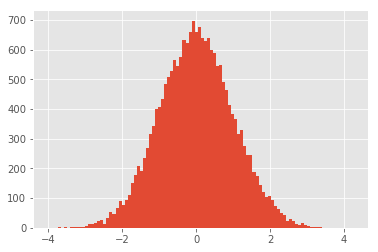

In [7]:
# plot
cc = plt.hist(pan['x0'],100)

In [8]:
# each column is a Series type that inherits from numpy array
a = pan['x0']
print('column is type ',type(a),' items are of type ',a.dtype)
#print(a[:10])
ar = a.values # is the numpy array
print('values are of type ',type(ar))

column is type  <class 'pandas.core.series.Series'>  items are of type  float64
values are of type  <class 'numpy.ndarray'>


In [9]:
# we can apply selections to the series
# operators and, or, not (& | ~)
ind = (pan['x0'] > 1.2) & (pan['x0'] < 3.)
print('selection is of type ',type(ind),' items are of type ',ind.dtype)
ind[:4]

selection is of type  <class 'pandas.core.series.Series'>  items are of type  bool


0    False
1    False
2    False
3    False
Name: x0, dtype: bool

 mean -0.010922771686964098 std 0.9812937138197635


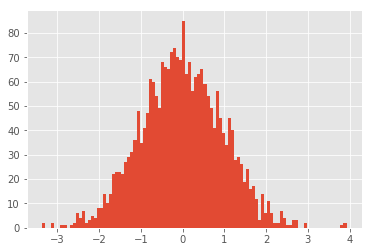

In [10]:
# we can apply that selection to another serie
val = pan['x1'][ind]
cc = plt.hist(val,100)
print(' mean {} std {}'.format(np.mean(val), np.std(val)))

 dataframe has now 2349 entries


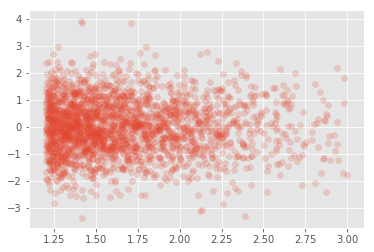

In [11]:
# or to the full dataframe
fpan = pan[['x0','x1']][ind]
print(' dataframe has now {} entries'.format(len(fpan)))
cc = plt.scatter(fpan['x0'],fpan['x1'], alpha=0.2)

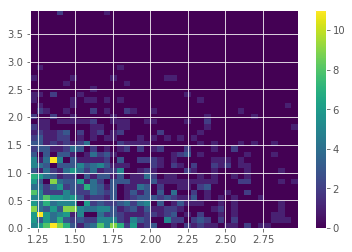

In [12]:
# plotting a 2D histogram
ind = fpan['x1'] > 0.
cc = plt.hist2d(fpan['x0'][ind], fpan['x1'][ind], 40)
plt.colorbar()

## adding more colums

In [13]:
pan['xplus'] = pan['x0']+ pan['x1']

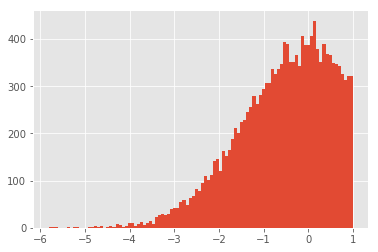

In [14]:
cc = plt.hist(pan['xplus'][pan['xplus']<1.], 100)

## saving dataframe

In [15]:
# saving to hdf5 as a table
fpan.to_hdf('store.h5','df', mode='w', format='table', data_columns=True)

# savint to csv
fpan.to_csv('store.csv')

In [16]:
# getting the panda table back
store = pd.HDFStore('store.h5')
fpan2 = store.df
print(' panda read back, len {}'.format(len(fpan2)))
print(' labels ',fpan2.columns)

 panda read back, len 2349
 labels  Index(['x0', 'x1'], dtype='object')
